# Cross Validation

The purpose of this section is to investigate whether (and how well) cross validation can recover the true sparsity parameter $k$. We tested normal, logistic, and poisson cross validation results using 5 fold cross validation across 20 different model sizes $k \in \{1,2,...,20\}$ where $k_{true} = 10$. Since the purpose is on validating cross validation and not to test scalability, we ran code on 5000 samples and 100000 SNPs.

In [116]:
versioninfo()

Julia Version 1.0.3
Commit 099e826241 (2018-12-18 01:34 UTC)
Platform Info:
  OS: macOS (x86_64-apple-darwin14.5.0)
  CPU: Intel(R) Core(TM) i7-3740QM CPU @ 2.70GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.0 (ORCJIT, ivybridge)


In [117]:
using StatsPlots
using DelimitedFiles
using Statistics
using PyPlot
axisfont = Plots.font("Helvetica", 16)
ticfont = Plots.font("Helvetica", 12)
pyplot(guidefont=axisfont, xtickfont=ticfont, ytickfont=ticfont, legendfont=axisfont)

Plots.PyPlotBackend()

In [118]:
normal_cv_drs       = readdlm("normal_cv_drs") #drs stands for deviance residuals = MSEs
normal_cv_memory    = readdlm("normal_cv_memory")
normal_cv_run_times = readdlm("normal_cv_run_times")

normal_cv_drs_nodebias       = readdlm("normal_nodebias_cv_drs")
normal_cv_memory_nodebias    = readdlm("normal_nodebias_cv_memory")
normal_cv_run_times_nodebias = readdlm("normal_nodebias_cv_run_times")

logistic_cv_drs       = readdlm("logistic_cv_drs")
logistic_cv_memory    = readdlm("logistic_cv_memory")
logistic_cv_run_times = readdlm("logistic_cv_run_times")

logistic_cv_drs_nodebias       = readdlm("logistic_nodebias_cv_drs")
logistic_cv_memory_nodeibas    = readdlm("logistic_nodebias_cv_memory")
logistic_cv_run_times_nodebias = readdlm("logistic_nodebias_cv_run_times")

poisson_cv_drs       = readdlm("poisson_cv_drs")
poisson_cv_memory    = readdlm("poisson_cv_memory")
poisson_cv_run_times = readdlm("poisson_cv_run_times")

poisson_cv_drs_nodebias       = readdlm("poisson_nodebias_cv_drs")
poisson_cv_memory_nodeibas    = readdlm("poisson_nodebias_cv_memory")
poisson_cv_run_times_nodebias = readdlm("poisson_nodebias_cv_run_times")

negativebinomial_cv_drs       = readdlm("negativebinomial_cv_drs")
negativebinomial_cv_memory    = readdlm("negativebinomial_cv_memory")
negativebinomial_cv_run_times = readdlm("negativebinomial_cv_run_times")

negativebinomial_cv_drs_nodebias       = readdlm("negativebinomial_nodebias_cv_drs")
negativebinomial_cv_memory_nodeibas    = readdlm("negativebinomial_nodebias_cv_memory")
negativebinomial_cv_run_times_nodebias = readdlm("negativebinomial_nodebias_cv_run_times")

30×1 Array{Float64,2}:
  723.605480101
 1310.52133384 
 3902.362017684
  181.071130568
 3280.518750687
 1965.311386189
 2270.269617865
 2312.456346982
  248.632366025
  162.107247152
 1926.345827561
 1510.17957363 
 1028.397756985
    ⋮          
  106.202074525
 3138.228494485
 1253.331314154
  982.612668719
 2643.044761988
 1533.967872841
 4236.149379384
 1105.081067403
 1983.047078718
 1244.954562395
  723.911007075
 5205.898019507

# Normal cv plot

10.5


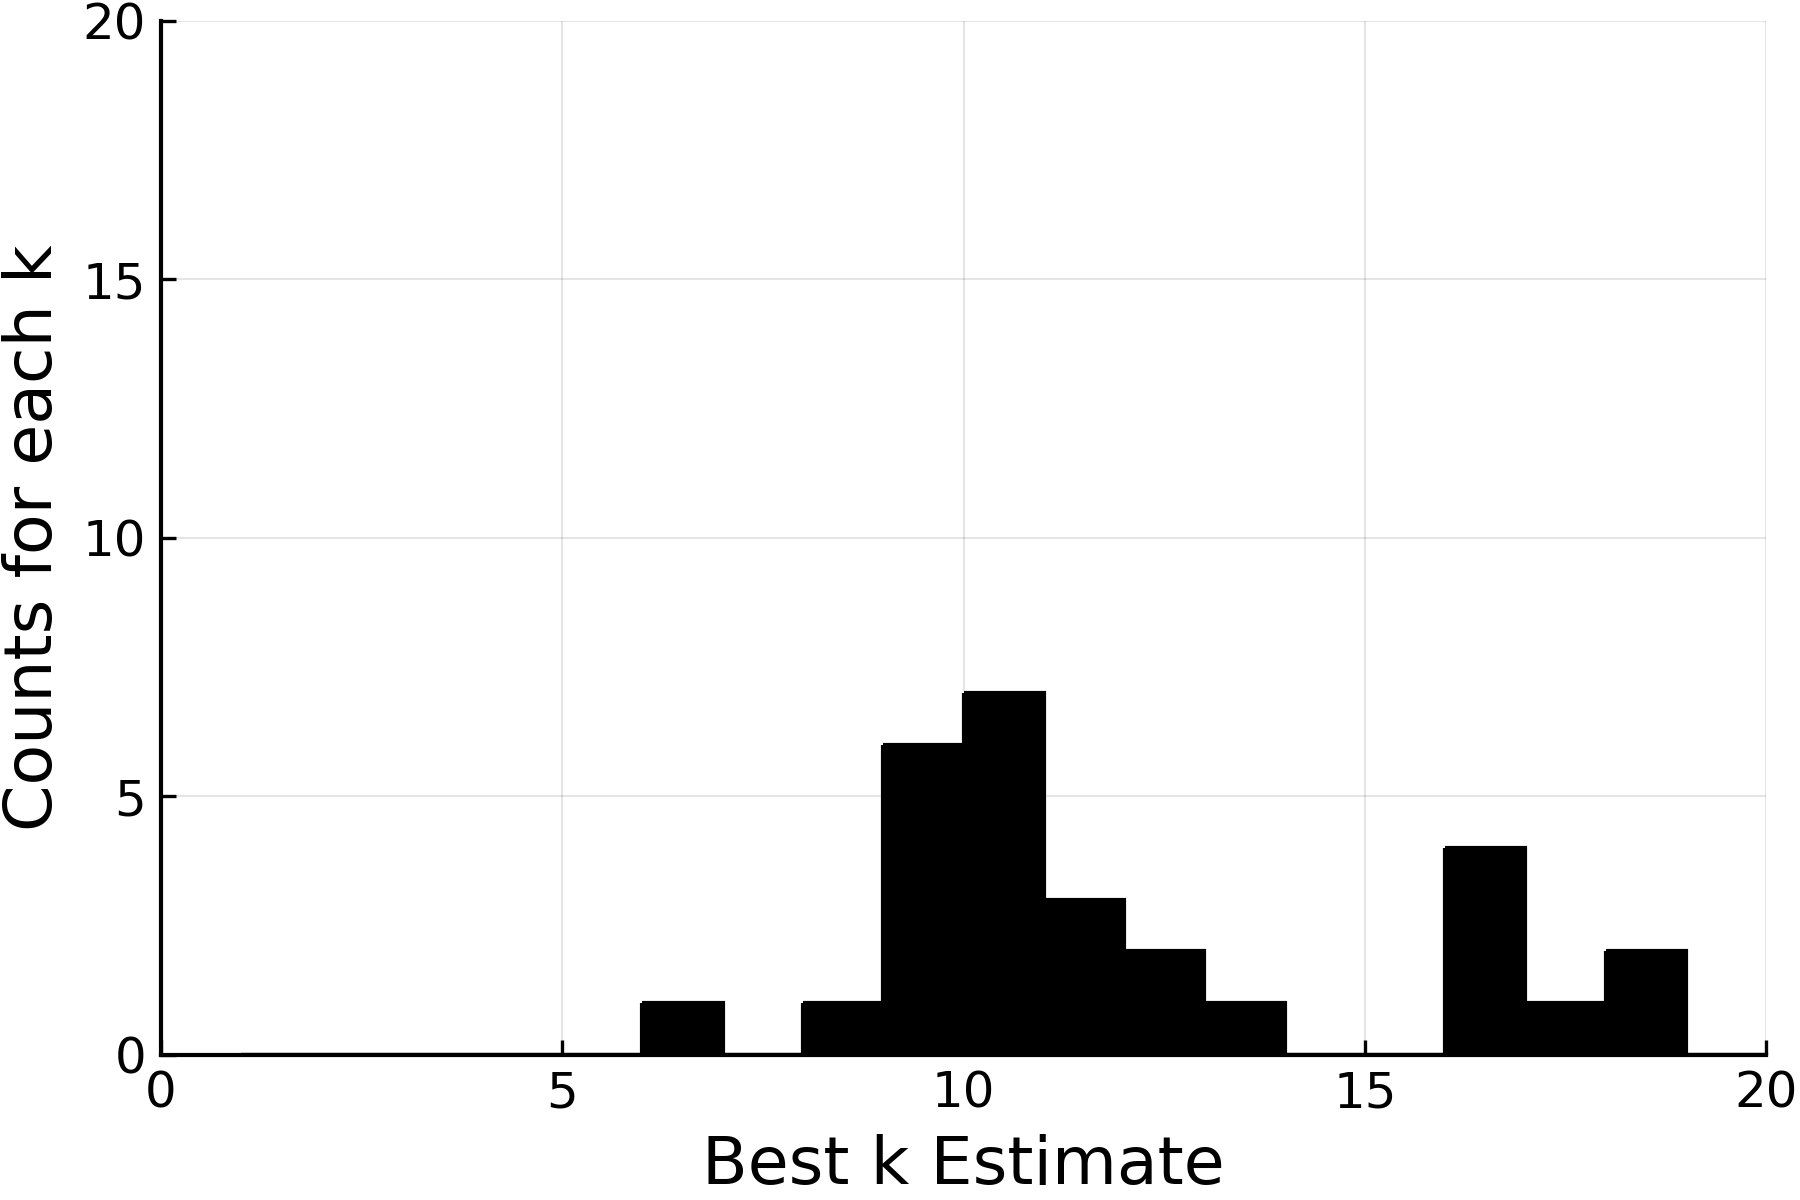

In [119]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(normal_cv_drs[:, i])
end
println(median(best_k))

normal_bar = histogram(best_k, ylim = (0, 20), xlim = (0, 20), dpi=300, legend=false, 
     color = :black, ylabel="Counts for each k", nbins=1:1:20, xlabel="Best k Estimate")

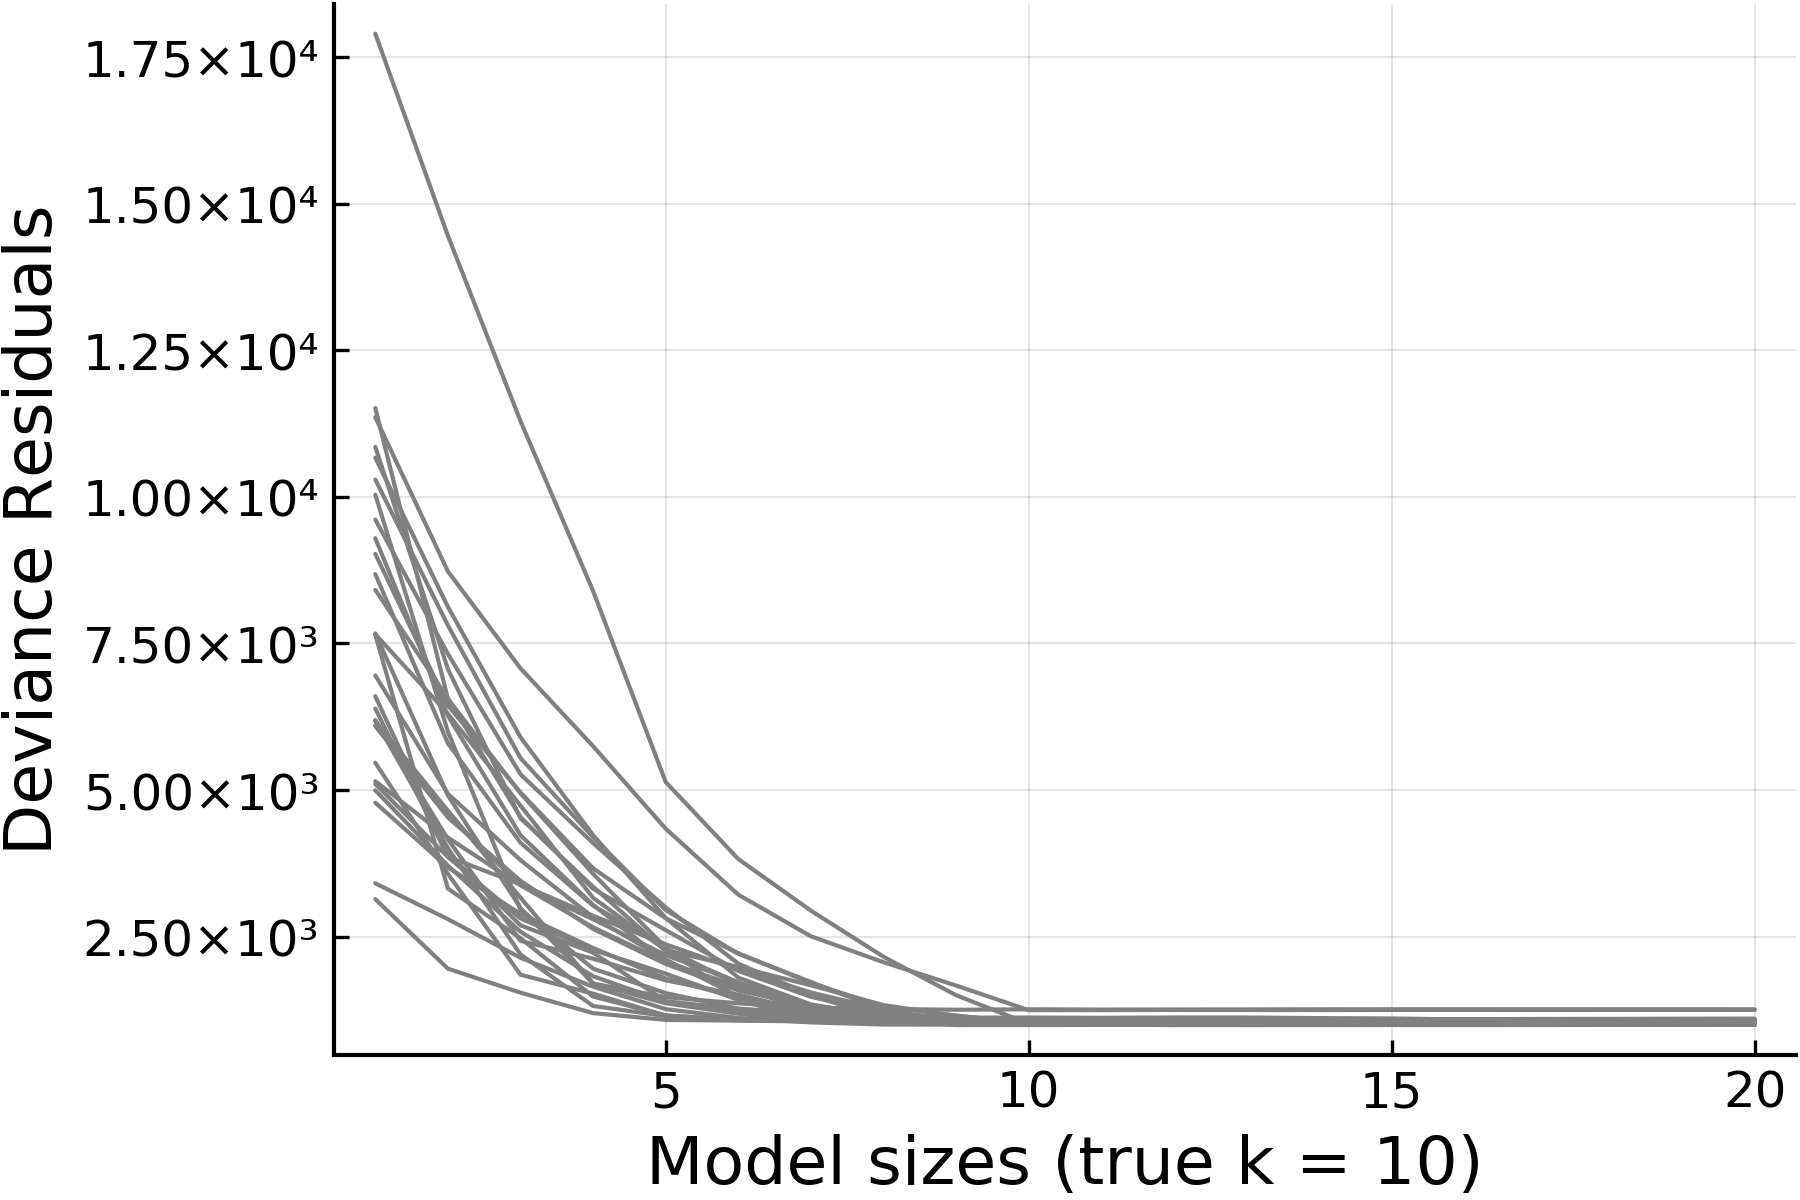

In [120]:
models = collect(1:20)
mylabels = Matrix{String}(undef, 1, 30)
for i in 1:30
    mylabels[1, i] = "run $i"
end
normal_plt = plot(models, normal_cv_drs, dpi = 300, label=mylabels, legend=false, 
    color = :grey, ylabel = "Deviance Residuals", xlabel = "Model sizes (true k = 10)")

# Logistic CV plot 

9.0


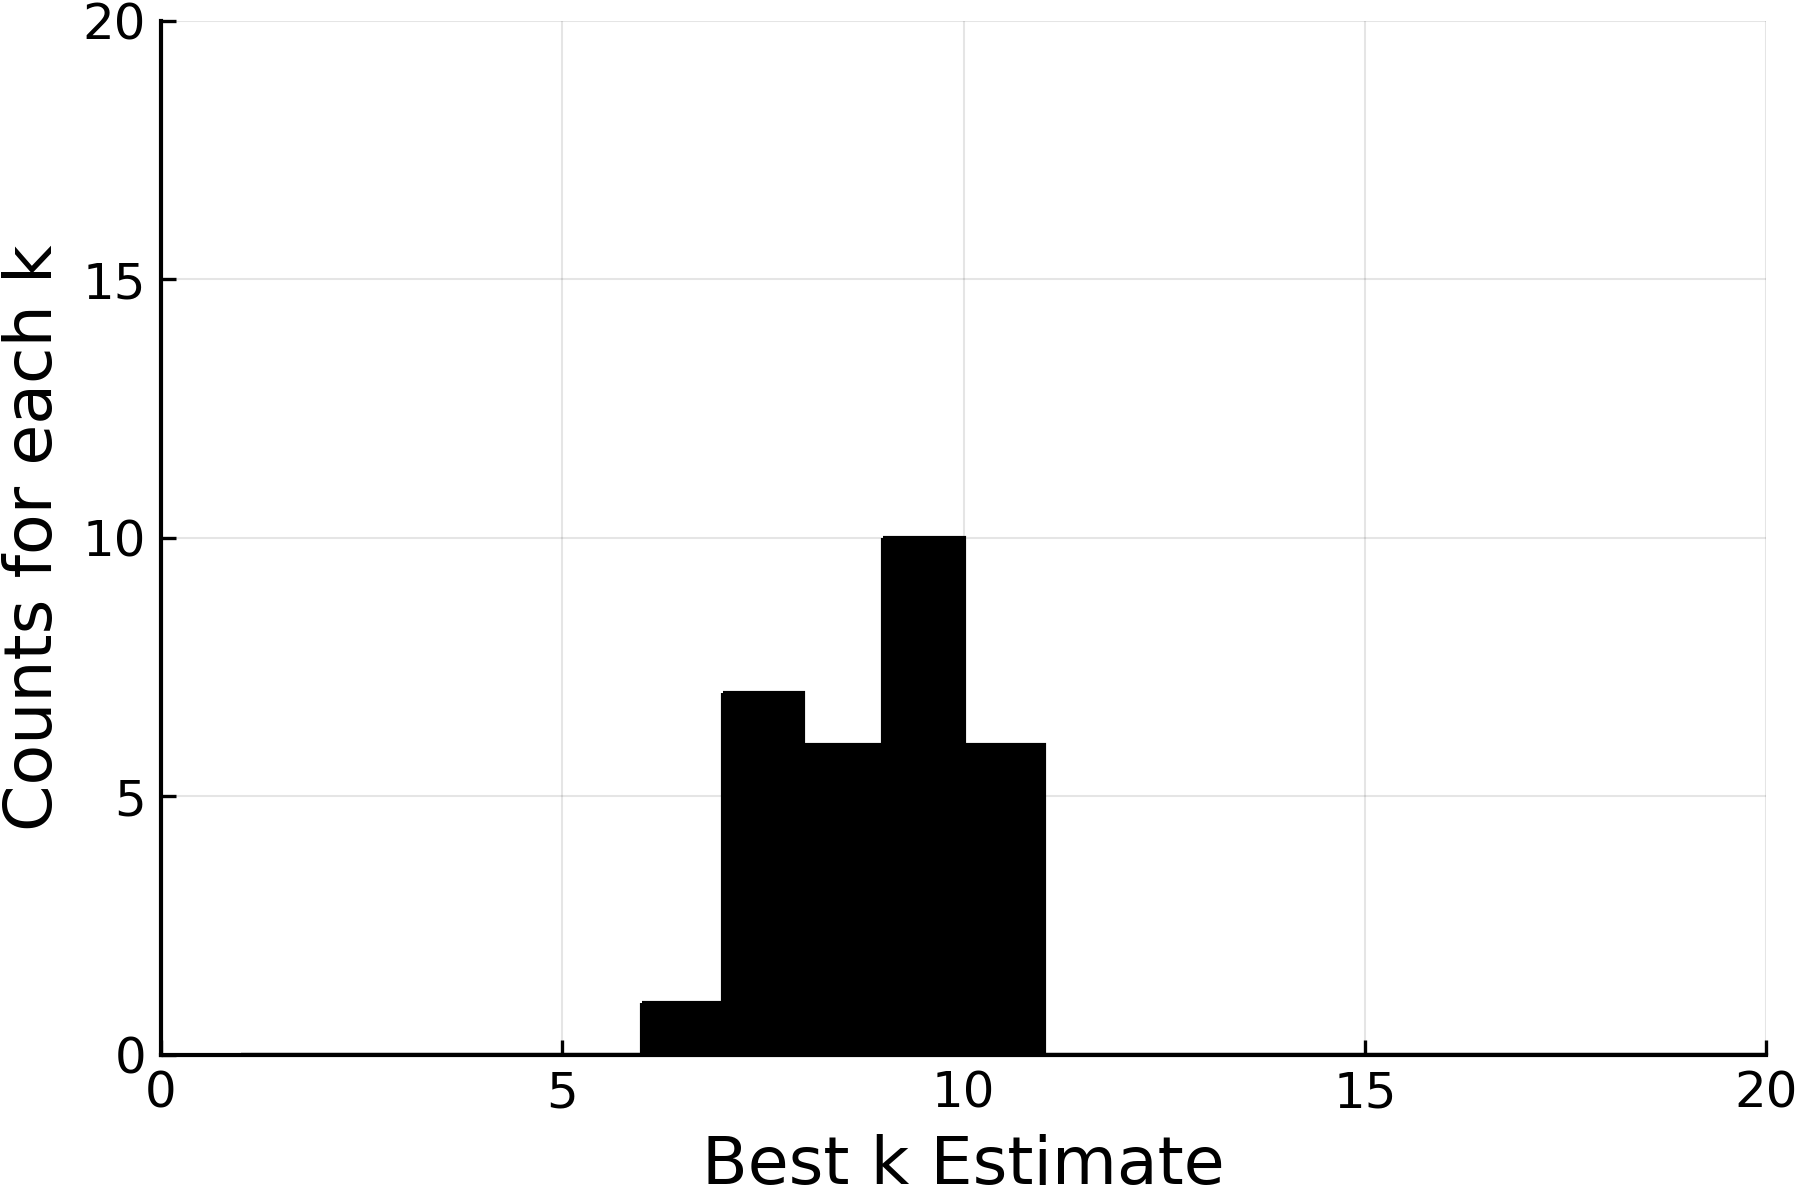

In [121]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(logistic_cv_drs[:, i])
end
println(median(best_k))

logistic_bar = histogram(best_k, ylim = (0, 20), xlim = (0, 20), dpi=300, legend=false, 
    color = :black, xlabel="Best k Estimate", nbins=1:1:20, 
    ylabel="Counts for each k")

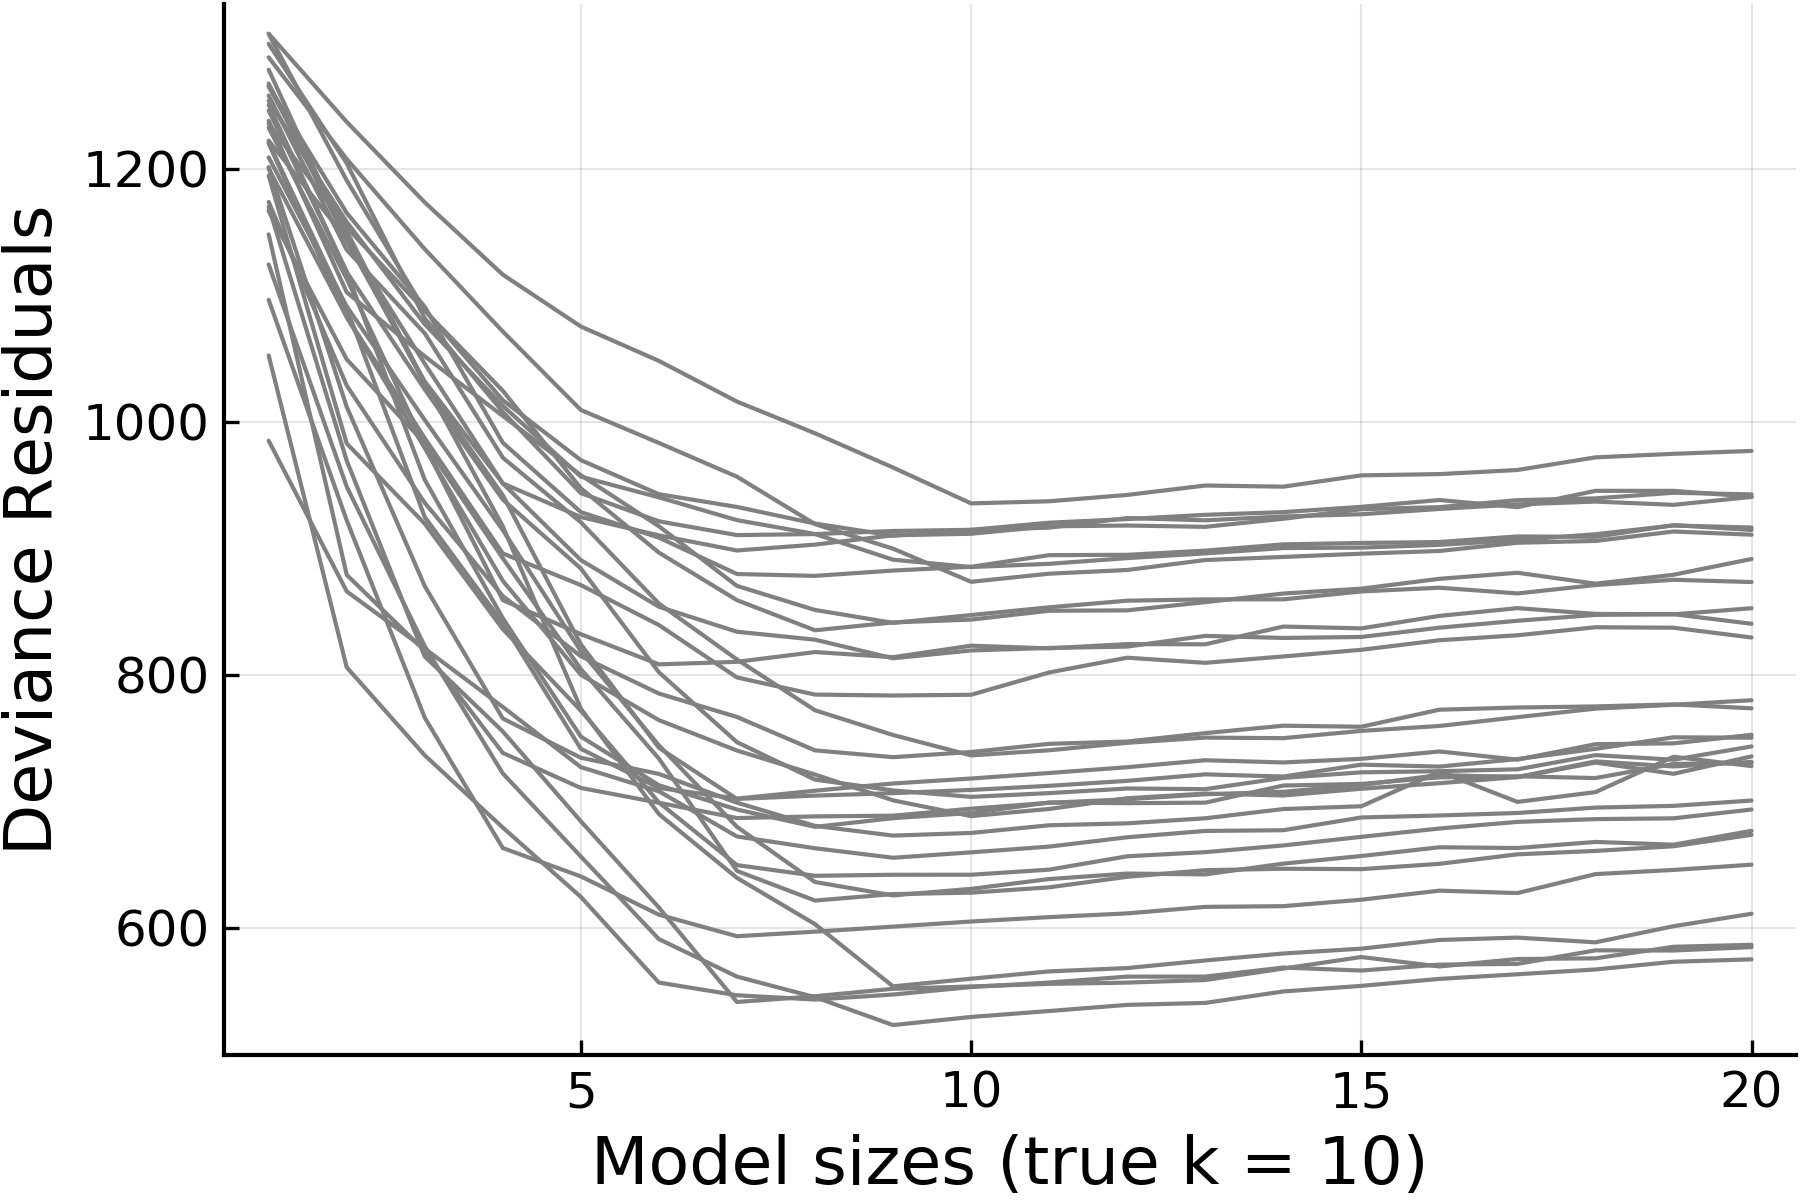

In [122]:
logistic_plt = plot(models, logistic_cv_drs, dpi = 300, label=mylabels, legend=false, 
    color = :grey, xlabel = "Model sizes (true k = 10)", ylabel = "Deviance Residuals")

# Poisson CV plot

8.5


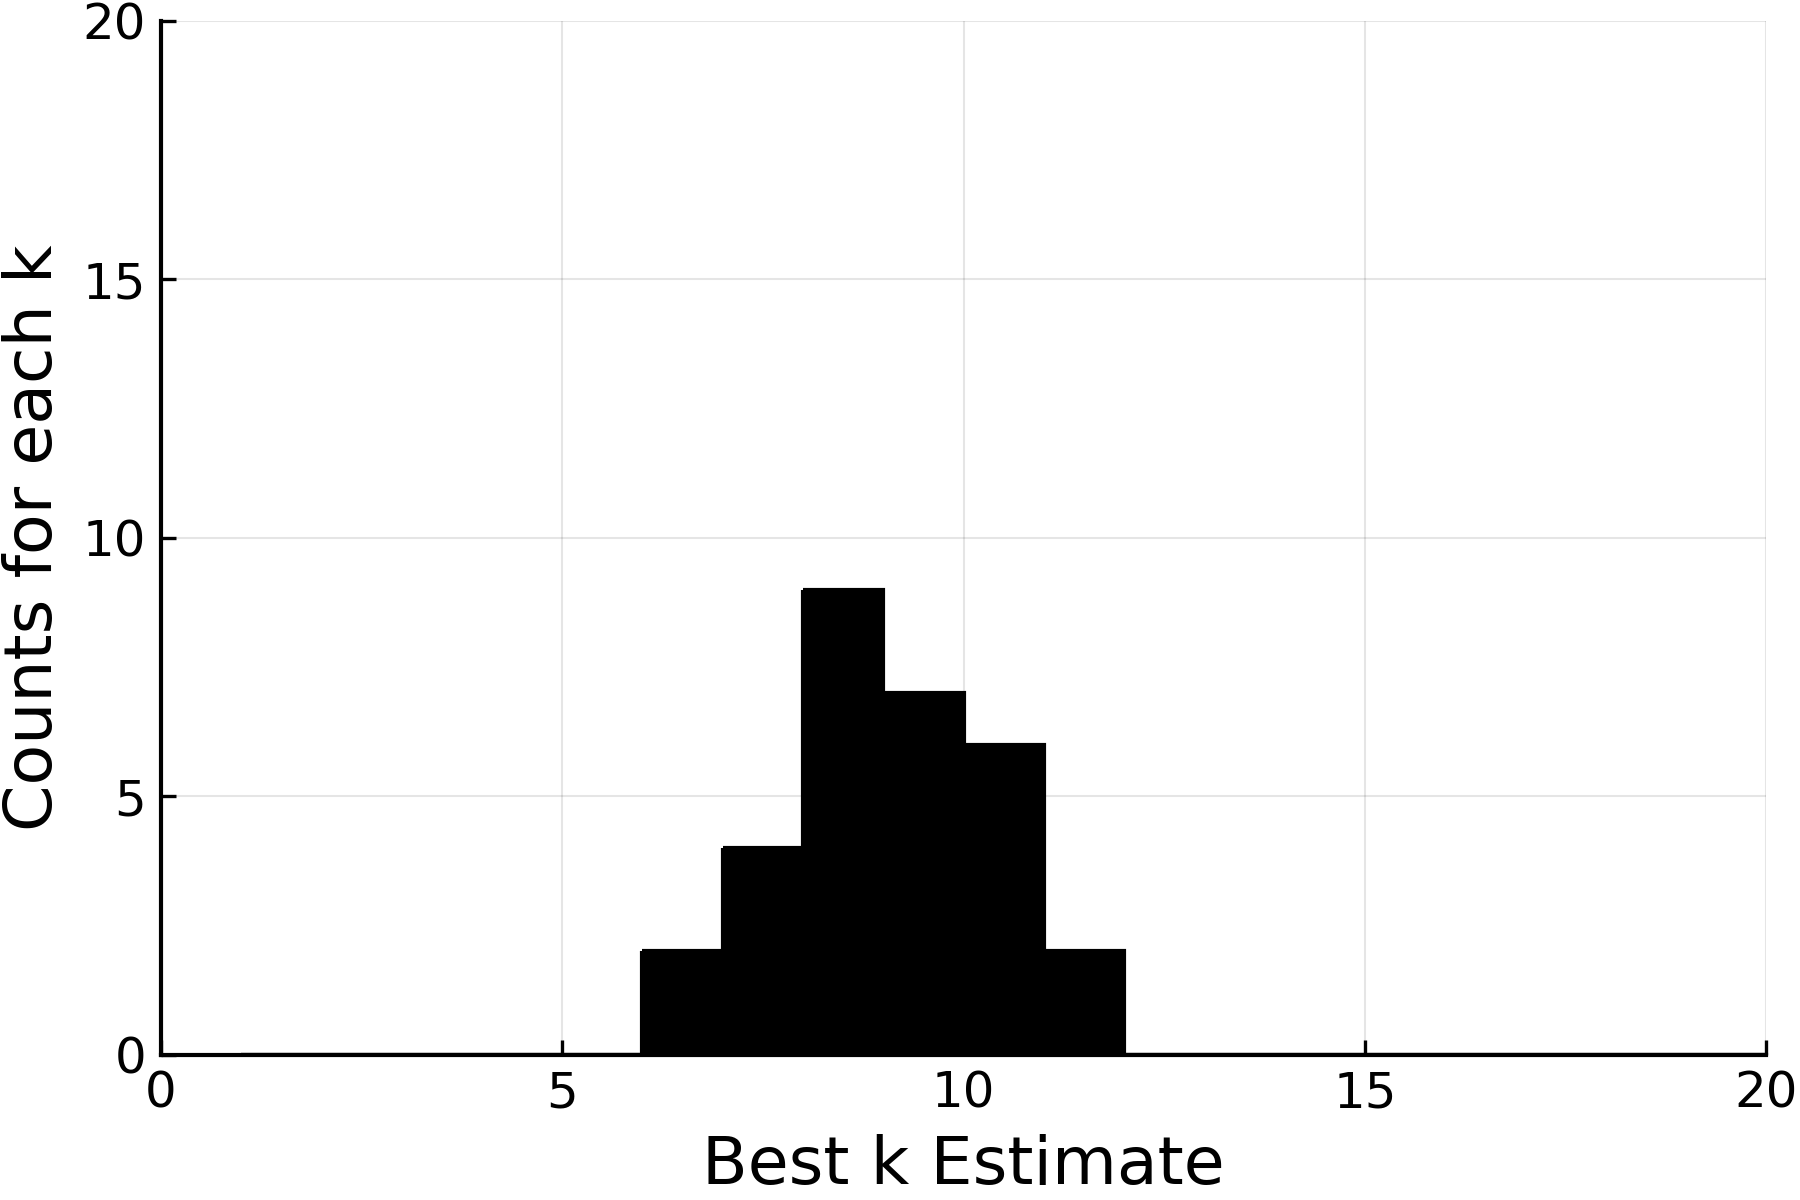

In [123]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(poisson_cv_drs[:, i])
end
println(median(best_k))
poisson_bar = histogram(best_k, ylim = (0, 20), xlim = (0, 20), dpi=300, legend=false, 
    color = :black, nbins=1:1:20, xlabel="Best k Estimate", 
    ylabel="Counts for each k")

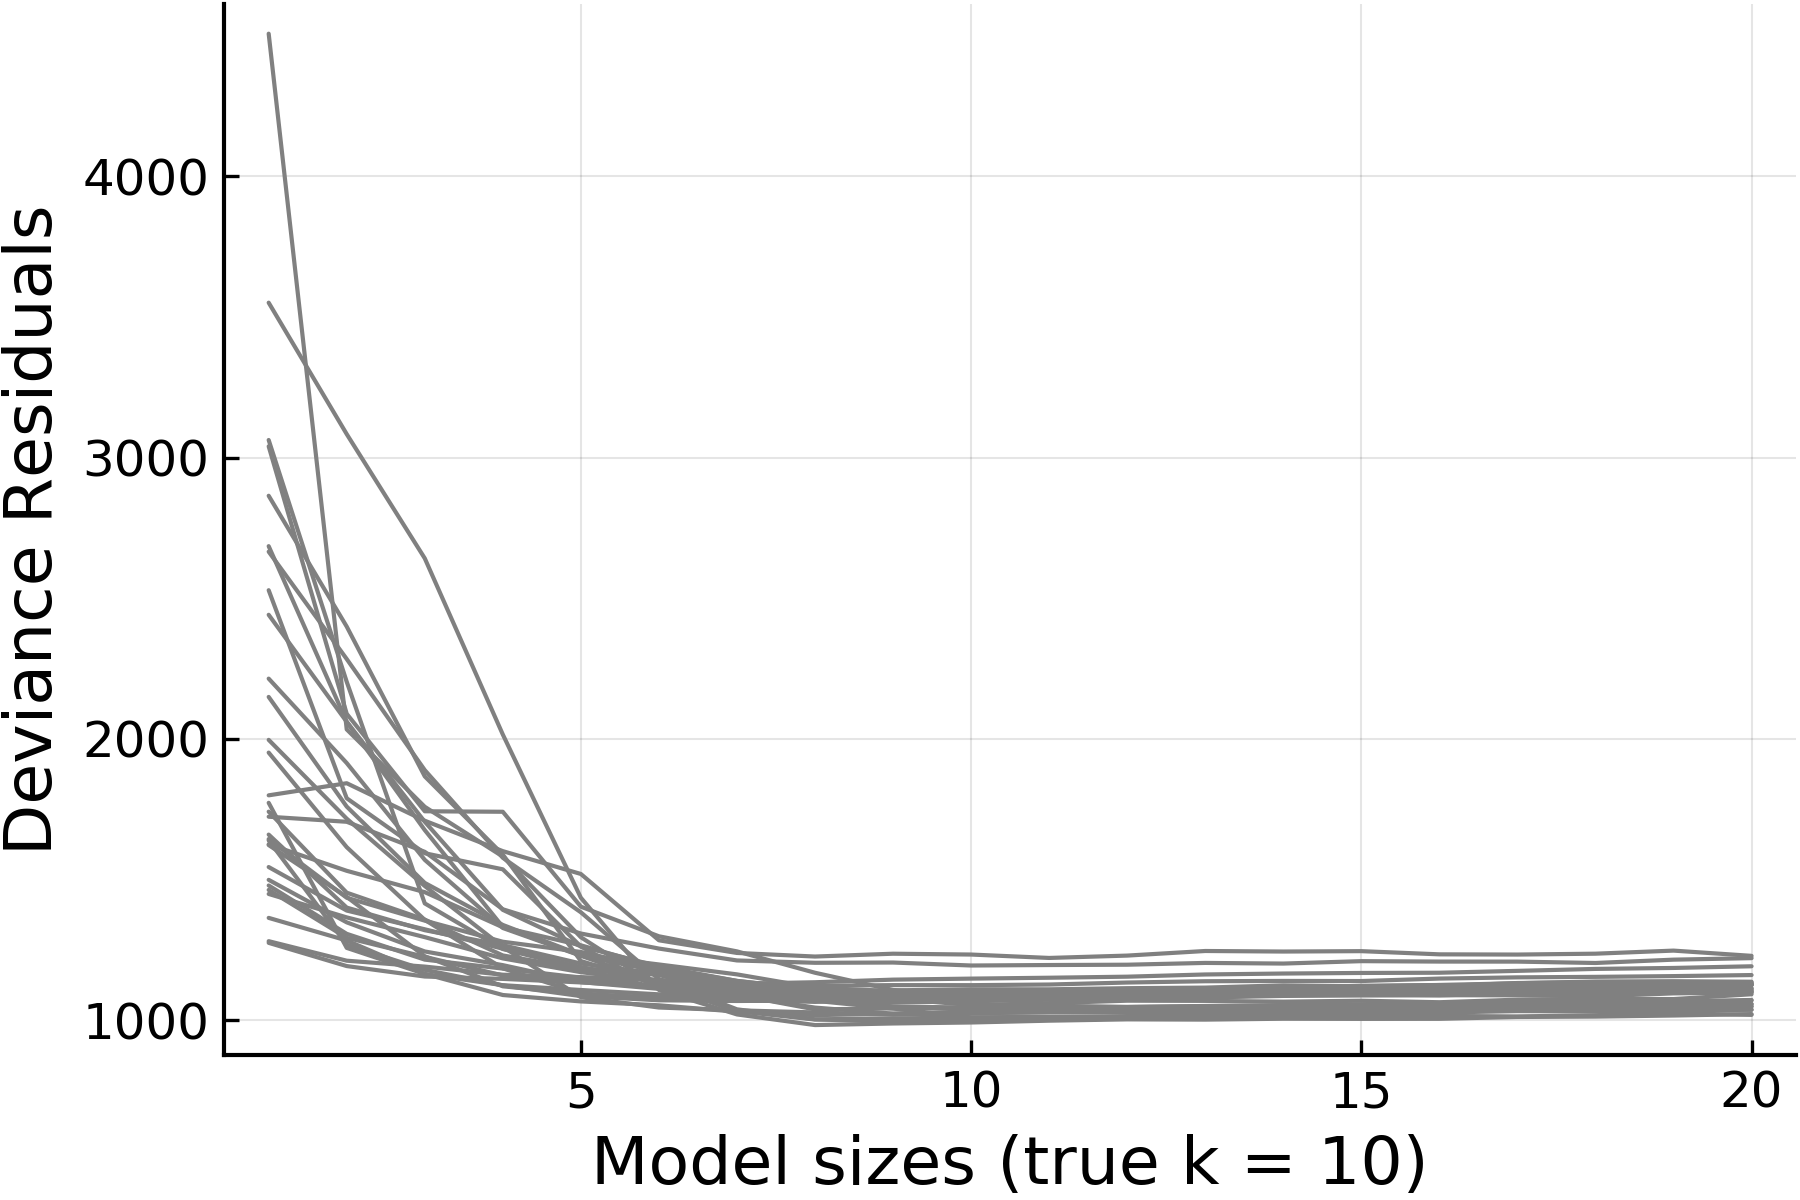

In [124]:
poisson_plt = plot(models, poisson_cv_drs, color = :grey, dpi = 300, 
    label=mylabels, legend=false, ylabel = "Deviance Residuals",
    xlabel = "Model sizes (true k = 10)")

# Negative Binomial Plots

best_k = [2.0, 6.0, 11.0, 20.0, 8.0, 7.0, 8.0, 10.0, 19.0, 20.0, 5.0, 7.0, 7.0, 13.0, 8.0, 20.0, 7.0, 15.0, 20.0, 11.0, 9.0, 20.0, 9.0, 17.0, 20.0, 8.0, 9.0, 11.0, 6.0, 9.0]
9.0


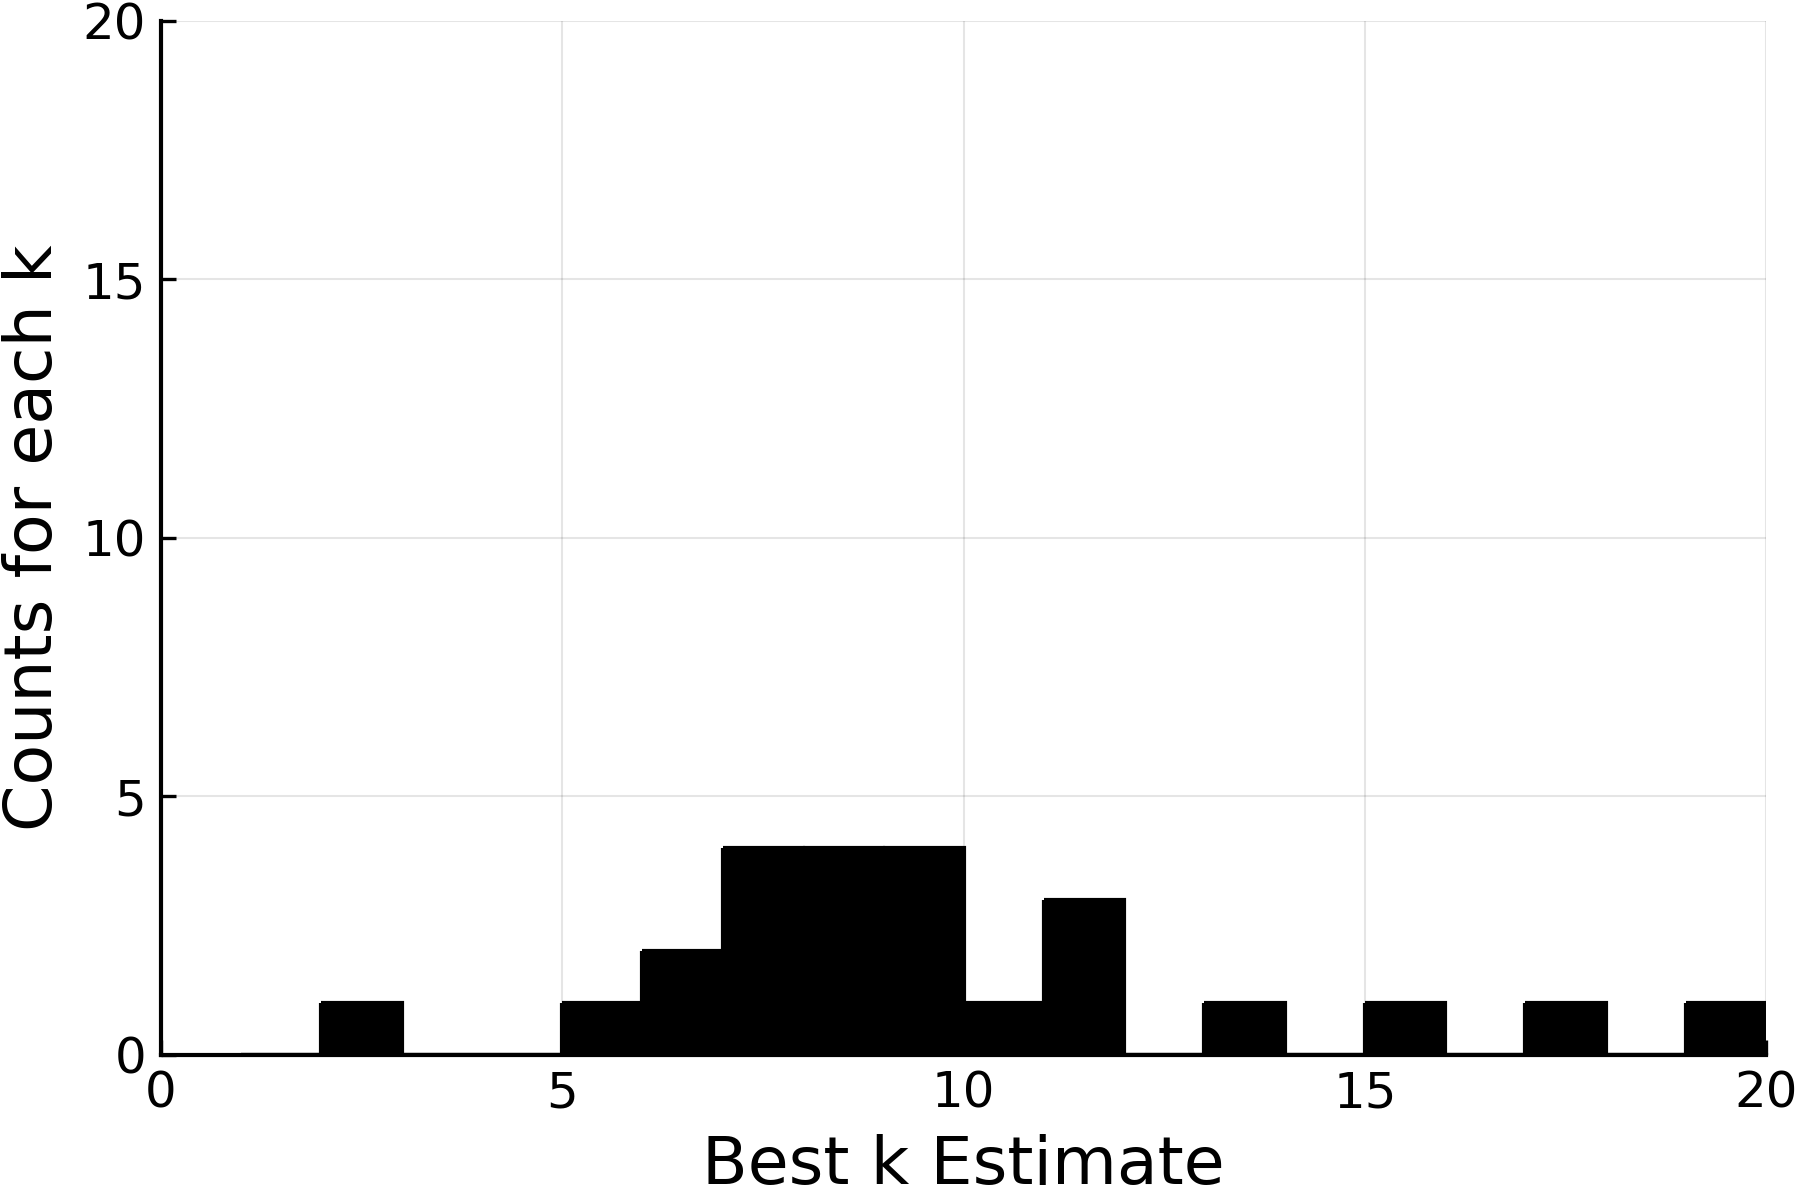

In [125]:
best_k = zeros(30)
for i in 1:30
    best_k[i] = argmin(negativebinomial_cv_drs[:, i])
end
@show best_k
println(median(best_k))

negativebinomial_bar = histogram(best_k, ylim = (0, 20), xlim = (0, 20), dpi=300, legend=false, 
    color = :black, nbins=1:1:20, xlabel="Best k Estimate", 
    ylabel="Counts for each k")

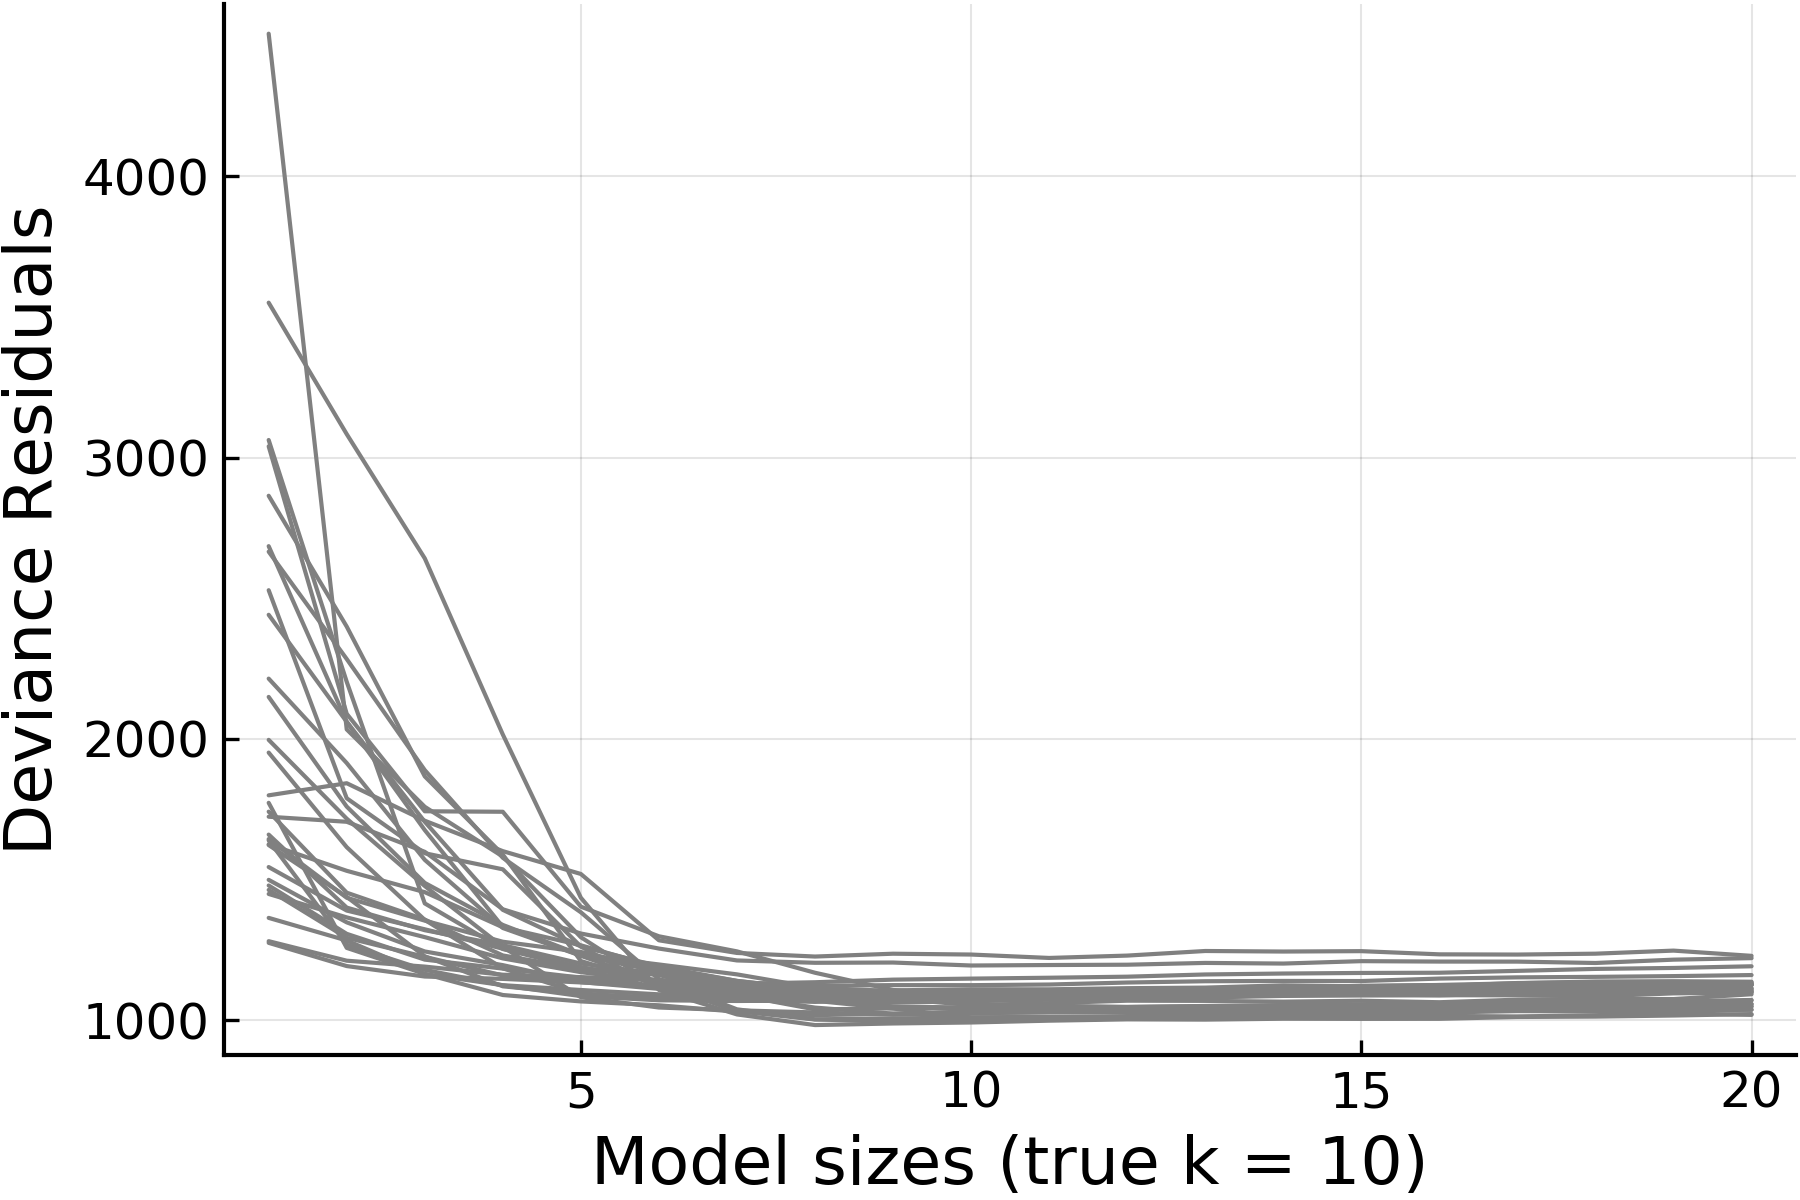

In [126]:
negativebinomial_plt = plot(models, poisson_cv_drs, color = :grey, dpi=300,
    label=mylabels, legend=false, ylabel = "Deviance Residuals", 
    xlabel = "Model sizes (true k = 10)")

In [127]:
StatsPlots.savefig(normal_plt, "normal_plt")
StatsPlots.savefig(logistic_plt, "logistic_plt")
StatsPlots.savefig(poisson_plt, "poisson_plt")
StatsPlots.savefig(negativebinomial_plt, "negativebinomial_plt")

In [128]:
StatsPlots.savefig(normal_bar, "normal_bar")
StatsPlots.savefig(logistic_bar, "logistic_bar")
StatsPlots.savefig(poisson_bar, "poisson_bar")
StatsPlots.savefig(negativebinomial_bar, "negativebinomial_bar")